In [19]:
# We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.
# Instructions
# Load the dataset and explore the variables.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
churn=pd.read_csv('customer_churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
# cols = []
# for column in range(len(churn.columns)):
#     cols.append(churn.columns[column].lower().replace(' ', '_')) 
# churn.columns = cols

In [23]:
# We will try to predict variable Churn using a logistic regression on variables tenure (months), SeniorCitizen, MonthlyCharges.
# Extract the target variable.
# Extract the independent variables
X = churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = churn['Churn']

In [24]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [25]:
y = pd.DataFrame(y, columns = ['Churn'])
y['Churn'] = y['Churn'].replace(['No', 'Yes'],['0','1'])
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


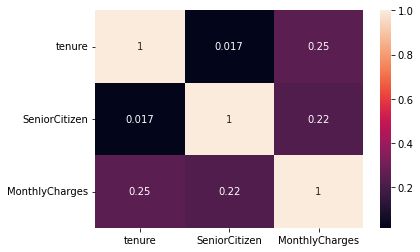

In [26]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [27]:
# Scale them.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

transformer = MinMaxScaler().fit(X_train_df) 
X_train_scaled = pd.DataFrame(transformer.transform(X_train_df),columns=X.columns)  # and here 
X_test_scaled = pd.DataFrame(transformer.transform(X_test_df),columns=X.columns)  # and here
display(X_train_scaled)
display(X_test_scaled)

,tenure,SeniorCitizen,MonthlyCharges
0,0.972222,0.0,0.562687
1,0.194444,0.0,0.575622
2,0.319444,0.0,0.312935
3,0.972222,0.0,0.917910
4,0.361111,0.0,0.509950
...,...,...,...
5629,0.861111,0.0,0.659204
5630,0.861111,0.0,0.963184
5631,0.375000,0.0,0.015920
5632,0.277778,0.0,0.707960


,tenure,SeniorCitizen,MonthlyCharges
0,0.319444,0.0,0.605970
1,0.986111,0.0,0.060697
2,0.805556,0.0,0.020398
3,1.000000,0.0,0.471144
4,0.041667,0.0,0.567662
...,...,...,...
1404,0.013889,0.0,0.009453
1405,0.527778,0.0,0.824876
1406,0.347222,0.0,0.371144
1407,0.527778,0.0,0.849751


In [28]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

In [29]:
# Build the logistic regression model.

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print(LR.predict_proba(X_train_scaled))

logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

[[0.96137426 0.03862574]
 [0.5580743  0.4419257 ]
 [0.81453244 0.18546756]
 ...
 [0.92853623 0.07146377]
 [0.53967721 0.46032279]
 [0.94304657 0.05695343]]


C:\Users\mfduh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


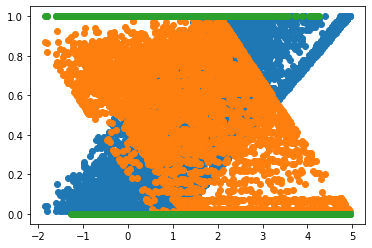

In [30]:
# blue
display(plt.scatter(logits,X_train_scaled['tenure']))
# orange        
display(plt.scatter(logits,X_train_scaled['MonthlyCharges']))
# green        
display(plt.scatter(logits,X_train_scaled['SeniorCitizen']))

<AxesSubplot:>

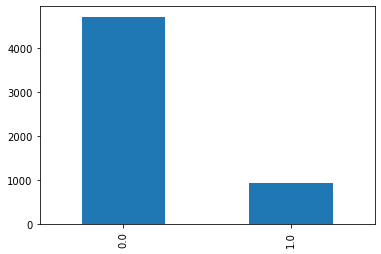

In [31]:
count_classes2 = X_train_scaled['SeniorCitizen'].value_counts()
display(count_classes2.plot(kind = 'bar'))

In [32]:
print('train score: ', LR.score(X_train_scaled, y_train))
print('test score: ', LR.score(X_test_scaled, y_test))

train score:  0.789847355342563
test score:  0.7998580553584103


In [34]:
# Evaluate the model.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label = '1'))
# the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
print("recall: ",recall_score(y_test,pred, pos_label = '1'))
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives
print("f1: ",f1_score(y_test,pred, pos_label = '1'))
# harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

precision:  0.6840148698884758
recall:  0.48293963254593175
f1:  0.5661538461538462


In [ ]:
# Even a simple model will give us more than 70% accuracy. Why?

In [ ]:
# accuracy alone is not a good evaluation option when you work with class-imbalanced data sets.
# https://medium.com/@limavallantin/why-you-should-not-trust-only-in-accuracy-to-measure-machine-learning-performance-a72cf00b4516
# Choosing the most chosen data will give us a 'good' accurancy just becuase the data behaves that way.

In [ ]:
# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors
# that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset.

In [35]:
# Oversampling
from sklearn.utils import resample
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.972222,0.0,0.562687,0
1,0.194444,0.0,0.575622,0
2,0.319444,0.0,0.312935,0
3,0.972222,0.0,0.917910,0
4,0.361111,0.0,0.509950,0


In [36]:
no_churn = train[train['Churn']=='0']
yes_churn = train[train['Churn']=='1']

display(no_churn.shape)
display(yes_churn.shape)

(4146, 4)

(1488, 4)

In [37]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, replace=True, n_samples = len(no_churn))

In [38]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.tail()

,tenure,SeniorCitizen,MonthlyCharges,Churn
1003,0.013889,0.0,0.569154,1
5353,0.055556,0.0,0.757711,1
3214,0.944444,1.0,0.866169,1
633,0.208333,0.0,0.014925,1
76,0.652778,0.0,0.908458,1


In [39]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [41]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='1'))
print("recall: ",recall_score(y_test,pred, pos_label='1'))
print("f1: ",f1_score(y_test,pred, pos_label='1'))

precision:  0.5207956600361664
recall:  0.7559055118110236
f1:  0.6167023554603854


In [61]:
# SMOTE

In [43]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100, k_neighbors=5)  # by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 5 here
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)
X_train_SMOTE.shape

(8292, 3)

In [45]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='1'))
print("recall: ",recall_score(y_test,pred, pos_label='1'))
print("f1: ",f1_score(y_test,pred, pos_label='1'))

precision:  0.5179856115107914
recall:  0.7559055118110236
f1:  0.6147278548559232


C:\Users\mfduh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# Build and evaluate the logistic regression model. Is it there any improvement?

In [ ]:
# There seems to be some improvement, though I would not consider the model as a very Valid model. 